In [ ]:
#Installing the required library
!pip install tensorflow==2.10.0
!pip install numpy==1.23.4
!pip install pandas==1.5.2
!pip install scikit-learn==1.1.3

In [13]:
# Data processing and visualization library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches
import seaborn as sns
# Tensorflow and keras library
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.models import load_model
# ScikitLearn library
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
# Misc
import os
import random
import sys
from unicodedata import name
from datetime import datetime
import time

print("To ensure repeatability, use the following setup:")
print("TensorFlow version:", "2.10.0")
print("Numpy version:", '1.23.4')
print("Pandas version:", '1.5.2')
print("SKLearn version:", "1.1.3")
print("Python version:", "3.8.6 (tags/v3.8.6:db45529, Sep 23 2020, 15:52:53) [MSC v.1927 64 bit (AMD64)]")
print("==============================")
print("Your current library version:")
print("TensorFlow version:", tf.__version__)
print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("SKLearn version:", sklearn.__version__)
print("Python version:",sys.version)

To ensure repeatability, use the following setup:
TensorFlow version: 2.10.0
Numpy version: 1.23.4
Pandas version: 1.5.2
SKLearn version: 1.1.3
Python version: 3.8.6 (tags/v3.8.6:db45529, Sep 23 2020, 15:52:53) [MSC v.1927 64 bit (AMD64)]
Your current library version:
TensorFlow version: 2.10.0
Numpy version: 1.23.4
Pandas version: 1.5.2
SKLearn version: 1.1.3
Python version: 3.8.6 (tags/v3.8.6:db45529, Sep 23 2020, 15:52:53) [MSC v.1927 64 bit (AMD64)]


In [14]:
# Get the current directory
current_directory = os.getcwd()
# Construct the relative path to the CSV file
csv_filename1 = 'datasetscsv/trainval_set.csv' #Training-validation datasets
csv_filename2 = 'datasetscsv/test_set.csv' #Unseen test set
csv_filename3 = 'datasetscsv/master_dataset.csv' #Combined train-validation-test set
csv_filename4 = 'datasetscsv/allMolecule.csv' #Molecule only set
csv_path1 = os.path.join(current_directory, csv_filename1)
csv_path2 = os.path.join(current_directory, csv_filename2)
csv_path3 = os.path.join(current_directory, csv_filename3)
csv_path4 = os.path.join(current_directory, csv_filename4)
seed = 21
random.seed(seed)

model_name = 'Model/SWISH_WnD.h5'
model_path = os.path.join(current_directory, model_name)

In [15]:
# Importing dataset for model datastructure
trainval_df = pd.read_csv(csv_path1, names=["Molecule", "Formula","SMILES","Type","Cyclicity",
                                       "Primary counts","Secondary counts","Tertiary counts",
                                       "Hydroxyl counts","Carboxyl counts","Oxyl counts",
                                       "M0(nhb)", "M0(oh)", "M0(nh)", "M0(op)", 
                                       "M1(nhb_donor)", "M1(nhb_weak)", "M1(nhb_acceptor)",
                                       "M1(oh_donor)", "M1(oh_weak)","M1(oh_acceptor)",
                                       "M1(nh_donor)", "M1(nh_weak)", "M1(nh_acceptor)",
                                       "M1(op_donor)", "M1(op_weak)", "M1(op_acceptor)",
                                       "M2(nhb)", "M2(oh)", "M2(nh)","M2(op)",
                                       "MW","Partial Pressure","Temperature",
                                       "Amine Concentration", "Absorption Capacity", "References","Rounded Concentration", "Abbreviation"]) 
test_df     = pd.read_csv(csv_path2, names=["Molecule", "Formula","SMILES","Type","Cyclicity", 
                                       "Primary counts","Secondary counts","Tertiary counts",
                                       "Hydroxyl counts","Carboxyl counts","Oxyl counts",
                                       "M0(nhb)", "M0(oh)", "M0(nh)", "M0(op)", 
                                       "M1(nhb_donor)", "M1(nhb_weak)", "M1(nhb_acceptor)",
                                       "M1(oh_donor)", "M1(oh_weak)","M1(oh_acceptor)",
                                       "M1(nh_donor)", "M1(nh_weak)", "M1(nh_acceptor)",
                                       "M1(op_donor)", "M1(op_weak)", "M1(op_acceptor)",
                                       "M2(nhb)", "M2(oh)", "M2(nh)","M2(op)",
                                       "MW","Partial Pressure","Temperature",
                                       "Amine Concentration", "Absorption Capacity", "References","Rounded Concentration", "Abbreviation"]) 
# PREPROCESSING
X_test_label = test_df.drop(columns=["Absorption Capacity"])
y_test = test_df['Absorption Capacity']

X_trainval_label =  trainval_df.drop(columns=["Absorption Capacity"])
y_trainval_label = trainval_df['Absorption Capacity']

# DATA SPLITING
X_train, X_val, y_train, y_val = train_test_split(X_trainval_label, y_trainval_label, test_size=0.20, random_state=seed)

# Reserve the dataset for visualization
X_train_1 = X_train.copy()
X_val_1 = X_val.copy()
X_reserved = pd.concat([X_train_1, X_val_1, X_test_label], axis=0)

# DROPPING STRINGS AND DATA PREPROCESSING
X_train = X_train.drop(columns=["Molecule", "Formula", "SMILES", "Type", "Cyclicity", "References", "Rounded Concentration", "Abbreviation"])
X_test = X_test_label.drop(columns=["Molecule", "Formula", "SMILES", "Type", "Cyclicity", "References", "Rounded Concentration", "Abbreviation"])
X_val = X_val.drop(columns=["Molecule", "Formula", "SMILES", "Type", "Cyclicity", "References", "Rounded Concentration", "Abbreviation"])

feature_names = X_train.columns.tolist()
preprocessor = Pipeline(steps=[('step1', StandardScaler())])
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_train = pipeline.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=feature_names)

X_val = pipeline.transform(X_val)
X_val = pd.DataFrame(X_val, columns=feature_names)

X_test = pipeline.transform(X_test)
X_test = pd.DataFrame(X_test, columns=feature_names)

#Overwriting dataset with master dataset
master_df = pd.read_csv(csv_path3, 
    names=["Molecule","Formula","SMILES","Type","Cyclicity",
           "Primary counts","Secondary counts","Tertiary counts",
           "Hydroxyl counts","Carboxyl counts","Oxyl counts",
           "M0(nhb)", "M0(oh)", "M0(nh)", "M0(op)", 
           "M1(nhb_donor)", "M1(nhb_weak)", "M1(nhb_acceptor)",
           "M1(oh_donor)", "M1(oh_weak)","M1(oh_acceptor)",
           "M1(nh_donor)", "M1(nh_weak)", "M1(nh_acceptor)",
           "M1(op_donor)", "M1(op_weak)", "M1(op_acceptor)",
           "M2(nhb)", "M2(oh)", "M2(nh)","M2(op)",
           "MW","Partial Pressure","Temperature",
           "Amine Concentration", "Absorption Capacity", "References","Rounded Concentration","Abbreviation"]) 
scaler = preprocessor.named_steps['step1']
mean_values = scaler.mean_[27] # pressure structure
std_values = scaler.scale_[27] # pressure structure

75/75 [==============================] - 0s 2ms/step
Train data RMSE:  0.07332510687812666
Train data MAE:  0.047792139644374294
Train data R^2:  0.9645999726275404
19/19 [==============================] - 0s 2ms/step
Validation data RMSE:  0.09293478436751261
Validation data MAE:  0.058930134036087746
Validation data R^2:  0.9481187325023597
4/4 [==============================] - 0s 2ms/step
Test data RMSE:  0.10271345917975686
Test data MAE:  0.07521465493063642
Test data R^2:  0.860148082492637


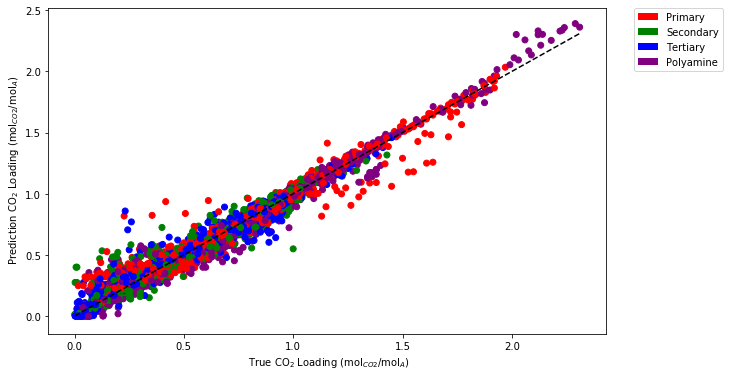

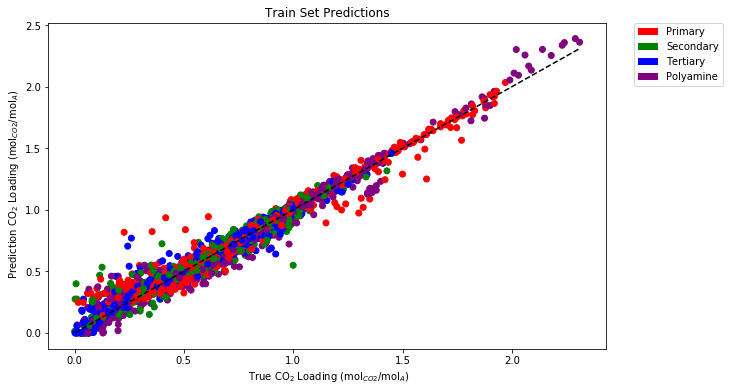

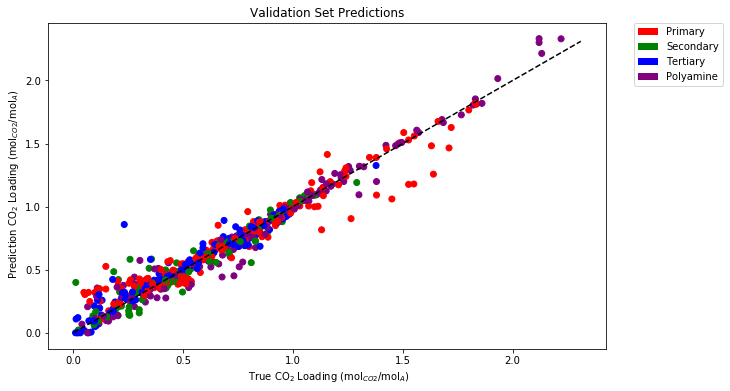

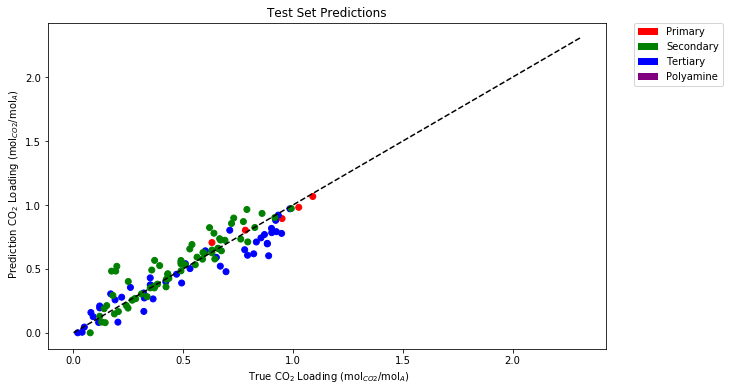

In [16]:
# evaluate the model on the test data
model = load_model(model_path)
y_train_pred = model.predict(X_train)
print("Train data RMSE: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Train data MAE: ", mean_absolute_error(y_train, y_train_pred))
print("Train data R^2: ", r2_score(y_train, y_train_pred))

y_val_pred = model.predict(X_val)
print("Validation data RMSE: ", np.sqrt(mean_squared_error(y_val, y_val_pred)))
print("Validation data MAE: ", mean_absolute_error(y_val, y_val_pred))
print("Validation data R^2: ", r2_score(y_val, y_val_pred))

y_test_pred = model.predict(X_test)
print("Test data RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Test data MAE: ", mean_absolute_error(y_test, y_test_pred))
print("Test data R^2: ", r2_score(y_test, y_test_pred))

averaged_r_score = (r2_score(y_train, y_train_pred)+r2_score(y_test, y_test_pred)+r2_score(y_val, y_val_pred))/3
#print("Averaged R^2: ", averaged_r_score)

dz_1 = X_train_1['Type']
df_1 = pd.DataFrame(dz_1)

dz_2 = X_test_label['Type']
df_2 = pd.DataFrame(dz_2)

dz_3 = X_val_1['Type']
df_3 = pd.DataFrame(dz_3)

# Assign a color to each categorical value (train__set)
colors_1 = {'Primary': 'red', 'Secondary': 'green', 'Tertiary': 'blue', 'Polyamine': 'purple'}
df_1['color'] = df_1['Type'].map(colors_1)

# Assign a color to each categorical value (train__set)
colors_2 = {'Primary': 'red', 'Secondary': 'green', 'Tertiary': 'blue', 'Polyamine': 'purple'}
df_2['color'] = df_2['Type'].map(colors_2)

# Assign a color to each categorical value (train__set)
colors_3 = {'Primary': 'red', 'Secondary': 'green', 'Tertiary': 'blue', 'Polyamine': 'purple'}
df_3['color'] = df_3['Type'].map(colors_3)

#Visualize predictions for train, test, and validation data
x_vals = np.linspace(min(y_train), max(y_train), 100)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, c=df_1['color'])
plt.scatter(y_test, y_test_pred, c=df_2['color'])
plt.scatter(y_val, y_val_pred, c=df_3['color'])
plt.plot(x_vals, x_vals, color='black', linestyle='--')
plt.xlabel(' True CO$_{2}$ Loading (mol$_{CO2}$/mol$_{A}$)')
plt.ylabel(' Prediction CO$_{2}$ Loading (mol$_{CO2}$/mol$_{A}$)')
legend_elements = [
    matplotlib.patches.Patch(facecolor=color, label=label)
    for label, color in colors_1.items()
]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# Plotting the predictions for the train set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, c=df_1['color'])
plt.plot(x_vals, x_vals, color='black', linestyle='--')
plt.title('Train Set Predictions')
plt.xlabel(' True CO$_{2}$ Loading (mol$_{CO2}$/mol$_{A}$)')
plt.ylabel(' Prediction CO$_{2}$ Loading (mol$_{CO2}$/mol$_{A}$)')
legend_elements = [
    matplotlib.patches.Patch(facecolor=color, label=label)
    for label, color in colors_1.items()
]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()
# Plotting the predictions for the validation set
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, c=df_3['color'])
plt.plot(x_vals, x_vals, color='black', linestyle='--')
plt.title('Validation Set Predictions')
plt.xlabel(' True CO$_{2}$ Loading (mol$_{CO2}$/mol$_{A}$)')
plt.ylabel(' Prediction CO$_{2}$ Loading (mol$_{CO2}$/mol$_{A}$)')
legend_elements = [
    matplotlib.patches.Patch(facecolor=color, label=label)
    for label, color in colors_1.items()
]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()
# Plotting the predictions for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, c=df_2['color'])
plt.plot(x_vals, x_vals, color='black', linestyle='--')
plt.title('Test Set Predictions')
plt.xlabel(' True CO$_{2}$ Loading (mol$_{CO2}$/mol$_{A}$)')
plt.ylabel(' Prediction CO$_{2}$ Loading (mol$_{CO2}$/mol$_{A}$)')
legend_elements = [
    matplotlib.patches.Patch(facecolor=color, label=label)
    for label, color in colors_1.items()
]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [17]:
Molecule_var      = master_df.drop(columns='Absorption Capacity')
Molecule_var      = Molecule_var.drop_duplicates(subset = 'Molecule')
Molecule_var      = Molecule_var.reset_index(drop=True)
#Assigning index for each molecule
Molecule_id       = Molecule_var.drop(columns= ["M0(nhb)", "M0(oh)", "M0(nh)", "M0(op)", 
                                                "M1(nhb_donor)", "M1(nhb_weak)", "M1(nhb_acceptor)",
                                                "M1(oh_donor)", "M1(oh_weak)","M1(oh_acceptor)",
                                                "M1(nh_donor)", "M1(nh_weak)", "M1(nh_acceptor)",
                                                "M1(op_donor)", "M1(op_weak)", "M1(op_acceptor)",
                                                "M2(nhb)", "M2(oh)", "M2(nh)","M2(op)",
                                                "MW","Partial Pressure","Temperature",
                                                "Formula","SMILES","Type","Cyclicity",
                                                "Primary counts","Secondary counts","Tertiary counts",
                                                "Hydroxyl counts","Carboxyl counts","Oxyl counts",
                                                "Amine Concentration","References","Rounded Concentration"])
Molecule_id       = Molecule_id.reset_index(drop=True)

In [18]:
#Defining constant operating condition to analyse
size = 1
fold = 1
T_ref = 303.15
T_tar = 313.15
percent_vol_CO2 = 0.15
Part_pres = 100
PCO2                       = np.ones(size)*Part_pres # PARTIAL PRESSURE IN kPa
T                          = np.ones(size)*T_tar # TEMPERATURE IN KELVIN'
C                          = np.ones(size)*3  #CONCENTRATION IN MOLAR

In [19]:
pred_alpha = []
for i in range(len(Molecule_id)):
    species = i
    # Create Prediction Set
    Prediction_set= pd.DataFrame(data={
                #DESCRIPTOR
                'Primary counts'                   : np.ones(size)*Molecule_var.iloc[species]['Primary counts'],
                'Secondary counts'                 : np.ones(size)*Molecule_var.iloc[species]['Secondary counts'],
                'Tertiary counts'                  : np.ones(size)*Molecule_var.iloc[species]['Tertiary counts'],
                'Hydroxyl counts'                  : np.ones(size)*Molecule_var.iloc[species]['Hydroxyl counts'],
                'Carboxyl counts'                  : np.ones(size)*Molecule_var.iloc[species]['Carboxyl counts'],
                'Oxyl counts'                      : np.ones(size)*Molecule_var.iloc[species]['Oxyl counts'],
                'M0(nhb)'                          : np.ones(size)*Molecule_var.iloc[species]['M0(nhb)'],
                'M0(oh)'                           : np.ones(size)*Molecule_var.iloc[species]['M0(oh)'],
                'M0(nh)'                           : np.ones(size)*Molecule_var.iloc[species]['M0(nh)'],
                'M0(op)'                           : np.ones(size)*Molecule_var.iloc[species]['M0(op)'],
                'M1(nhb_donor)'                    : np.ones(size)*Molecule_var.iloc[species]['M1(nhb_donor)'],
                'M1(nhb_weak)'                     : np.ones(size)*Molecule_var.iloc[species]['M1(nhb_weak)'],
                'M1(nhb_acceptor)'                 : np.ones(size)*Molecule_var.iloc[species]['M1(nhb_acceptor)'],
                'M1(oh_donor)'                     : np.ones(size)*Molecule_var.iloc[species]['M1(oh_donor)'],
                'M1(oh_weak)'                      : np.ones(size)*Molecule_var.iloc[species]['M1(oh_weak)'],
                'M1(oh_acceptor)'                  : np.ones(size)*Molecule_var.iloc[species]['M1(oh_acceptor)'],
                'M1(nh_donor)'                     : np.ones(size)*Molecule_var.iloc[species]['M1(nh_donor)'],
                'M1(nh_weak)'                      : np.ones(size)*Molecule_var.iloc[species]['M1(nh_weak)'],
                'M1(nh_acceptor)'                  : np.ones(size)*Molecule_var.iloc[species]['M1(nh_acceptor)'],
                'M1(op_donor)'                     : np.ones(size)*Molecule_var.iloc[species]['M1(op_donor)'],
                'M1(op_weak)'                      : np.ones(size)*Molecule_var.iloc[species]['M1(op_weak)'],
                'M1(op_acceptor)'                  : np.ones(size)*Molecule_var.iloc[species]['M1(op_acceptor)'],
                'M2(nhb)'                          : np.ones(size)*Molecule_var.iloc[species]['M2(nhb)'],
                'M2(oh)'                           : np.ones(size)*Molecule_var.iloc[species]['M2(oh)'],                
                'M2(nh)'                           : np.ones(size)*Molecule_var.iloc[species]['M2(nh)'],
                'M2(op)'                           : np.ones(size)*Molecule_var.iloc[species]['M2(op)'],
                'MW'                               : np.ones(size)*Molecule_var.iloc[species]['MW'],
                #OPERATING CONDITION
                'Partial Pressure'                 : PCO2, #x axis in 3d plot
                'Temperature'                      : T, #y axis in 3d plot
                'Amine Concentration'              : C            
                })

    Prediction_set_new = pipeline.transform(Prediction_set)
    column_names = Prediction_set.columns.tolist()
    Prediction_set_new = pd.DataFrame(Prediction_set_new, columns=column_names)

    #Prediction
    z_pred = model.predict(Prediction_set_new, verbose=0)
    pred_alpha.append(z_pred)
pred_alpha_reshaped = np.array(pred_alpha).reshape(len(Molecule_id), 1)
pr_load = pd.DataFrame(pred_alpha_reshaped,columns=['Predicted loading'])
result = pd.concat([Molecule_var['Molecule'],Molecule_var['Type'],Molecule_var['Abbreviation'] ,pr_load], axis=1)

In [20]:
#Defining variable for molecule analysis
itv = 3 #Temperature interval
selected = result

In [21]:
#calculating dH
size = 1
stored_P_each = []
stored_dH = []
stored_name = []
stored_cap = []
stored_Ntype = []
for k in range(len(selected)):
    start_time_inner = time.time()
    name = selected.iloc[k]['Abbreviation']
    Ntype = selected.iloc[k]['Type']
    stored_Ntype.append(Ntype)
    sel_mol = Molecule_id[Molecule_id['Abbreviation'] == name]
    sel_mol_index = sel_mol.index[0]
    species = sel_mol_index
    stored_name.append(sel_mol)
    abs_int = selected.iloc[k]['Predicted loading']
    desired_absorption_capacity = abs_int
    stored_cap.append(desired_absorption_capacity)
    stored_P  = []
    interval_T = np.linspace(T_ref, T_tar,itv)
    PCO2 = np.ones(size)*0
    for i in range(len(interval_T)):
        # Create Prediction Set
        Prediction_set= pd.DataFrame(data={
                    #DESCRIPTOR
                    'Primary counts'                   : np.ones(size)*Molecule_var.iloc[species]['Primary counts'],
                    'Secondary counts'                 : np.ones(size)*Molecule_var.iloc[species]['Secondary counts'],
                    'Tertiary counts'                  : np.ones(size)*Molecule_var.iloc[species]['Tertiary counts'],
                    'Hydroxyl counts'                  : np.ones(size)*Molecule_var.iloc[species]['Hydroxyl counts'],
                    'Carboxyl counts'                  : np.ones(size)*Molecule_var.iloc[species]['Carboxyl counts'],
                    'Oxyl counts'                      : np.ones(size)*Molecule_var.iloc[species]['Oxyl counts'],
                    'M0(nhb)'                          : np.ones(size)*Molecule_var.iloc[species]['M0(nhb)'],
                    'M0(oh)'                           : np.ones(size)*Molecule_var.iloc[species]['M0(oh)'],
                    'M0(nh)'                           : np.ones(size)*Molecule_var.iloc[species]['M0(nh)'],
                    'M0(op)'                           : np.ones(size)*Molecule_var.iloc[species]['M0(op)'],
                    'M1(nhb_donor)'                    : np.ones(size)*Molecule_var.iloc[species]['M1(nhb_donor)'],
                    'M1(nhb_weak)'                     : np.ones(size)*Molecule_var.iloc[species]['M1(nhb_weak)'],
                    'M1(nhb_acceptor)'                 : np.ones(size)*Molecule_var.iloc[species]['M1(nhb_acceptor)'],
                    'M1(oh_donor)'                     : np.ones(size)*Molecule_var.iloc[species]['M1(oh_donor)'],
                    'M1(oh_weak)'                      : np.ones(size)*Molecule_var.iloc[species]['M1(oh_weak)'],
                    'M1(oh_acceptor)'                  : np.ones(size)*Molecule_var.iloc[species]['M1(oh_acceptor)'],
                    'M1(nh_donor)'                     : np.ones(size)*Molecule_var.iloc[species]['M1(nh_donor)'],
                    'M1(nh_weak)'                      : np.ones(size)*Molecule_var.iloc[species]['M1(nh_weak)'],
                    'M1(nh_acceptor)'                  : np.ones(size)*Molecule_var.iloc[species]['M1(nh_acceptor)'],
                    'M1(op_donor)'                     : np.ones(size)*Molecule_var.iloc[species]['M1(op_donor)'],
                    'M1(op_weak)'                      : np.ones(size)*Molecule_var.iloc[species]['M1(op_weak)'],
                    'M1(op_acceptor)'                  : np.ones(size)*Molecule_var.iloc[species]['M1(op_acceptor)'],
                    'M2(nhb)'                          : np.ones(size)*Molecule_var.iloc[species]['M2(nhb)'],
                    'M2(oh)'                           : np.ones(size)*Molecule_var.iloc[species]['M2(oh)'],                
                    'M2(nh)'                           : np.ones(size)*Molecule_var.iloc[species]['M2(nh)'],
                    'M2(op)'                           : np.ones(size)*Molecule_var.iloc[species]['M2(op)'],
                    'MW'                               : np.ones(size)*Molecule_var.iloc[species]['MW'],
                    #OPERATING CONDITION
                    'Partial Pressure'                 : PCO2, #x axis in 3d plot
                    'Temperature'                      : interval_T[i], #y axis in 3d plot
                    'Amine Concentration'              : C            
                    })
        Prediction_set_new = pipeline.transform(Prediction_set)
        column_names = Prediction_set.columns.tolist()
        Prediction_set_new = pd.DataFrame(Prediction_set_new, columns=column_names)
        def loss_function(y_true, y_pred):
            return abs(y_true - y_pred)
        predicted_absorption_capacity = model.predict(Prediction_set_new, verbose=1)
        lower_bound = (min(X_train_1['Partial Pressure']) - mean_values)/std_values
        upper_bound = (max(X_train_1['Partial Pressure']) - mean_values)/std_values
        tolerance = 0.00001
        max_iterations = 1000

        for _ in range(max_iterations):
            current_partial_pressure = (lower_bound + upper_bound) / 2
            input_with_desired_absorption_capacity = Prediction_set_new.copy()
            input_with_desired_absorption_capacity['Partial Pressure'] = current_partial_pressure
            
            # Use the transformed input to make predictions
            predicted_absorption_capacity_inverse = model.predict(input_with_desired_absorption_capacity, verbose=0)
            
            loss = loss_function(desired_absorption_capacity, predicted_absorption_capacity_inverse)
            
            if loss < tolerance:
                break
            elif predicted_absorption_capacity_inverse < desired_absorption_capacity:
                lower_bound = current_partial_pressure
            else:
                upper_bound = current_partial_pressure
        optimal_partial_pressure = current_partial_pressure
        optimal_partial_pressure = round(optimal_partial_pressure*std_values + mean_values, 3)
        stored_P.append(optimal_partial_pressure)     
    stored_P_each.append(stored_P)
    time_taken = time.time() - start_time_inner
    print(name, f"Iteration {k + 1} took {time_taken:.5f} seconds")
for m in range(len(stored_P_each)):
    Xs = pd.DataFrame(1/interval_T, columns = ['1/T'])
    ys = pd.DataFrame(np.log(stored_P_each[m]), columns = ['lnP'])
    met = LinearRegression()
    findslope = met.fit(Xs, ys)
    heat = met.coef_[0]*8.314/1000
    stored_dH.append(heat)
dH_pred_reshape = np.array(stored_dH).reshape(len(stored_P_each), 1)
dH_pred_reshape = pd.DataFrame(dH_pred_reshape, columns=['dH_abs'])
name_reshape = np.array(stored_name).reshape(len(selected), 2)
name_reshape = pd.DataFrame(name_reshape, columns=['Molecule','Abbreviation'])

Ntype_reshape = np.array(stored_Ntype).reshape(len(selected), 1)
Ntype_reshape = pd.DataFrame(Ntype_reshape, columns=['Type'])

stored_cap_reshape = np.array(stored_cap).reshape(len(selected), 1)
stored_cap_reshape = pd.DataFrame(stored_cap_reshape, columns=['Equilibrium alpha'])

Results = pd.concat([name_reshape,Ntype_reshape,stored_cap_reshape,dH_pred_reshape], axis=1)

1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 21ms/step
AEPZ Iteration 1 took 4.51393 seconds
1/1 [==============================] - 0s 21ms/step
HEPR Iteration 2 took 4.47404 seconds
1/1 [==============================] - 0s 28ms/step
DMAE Iteration 3 took 4.13694 seconds
1/1 [==============================] - 0s 22ms/step
DMPZ Iteration 4 took 4.64857 seconds
1/1 [==============================] - 0s 26ms/step
DAH Iteration 5 took 4.73434 seconds
1/1 [==============================] - 0s 44ms/step
1A2P Iteration 6 took 6.78087 seconds
1/1 [==============================] - 0s 22ms/step
1DMA2P Iteration 7 took 4.25862 seconds
1/1 [==============================] - 0s 28ms/step
1EPZ Iteration 8 took 4.66505 seconds
1/1 [==============================] - 0s 34ms/step
1MPZ Iteration 9 took 4.73434 seconds
1/1 [==============================] - 0s 22ms/step
1PE Iteration 10 took 3.99732 seconds
1/1 [==============================] - 0s 26ms/step
DGA Iteration 11 took 3.92952 seconds
1/1 [====

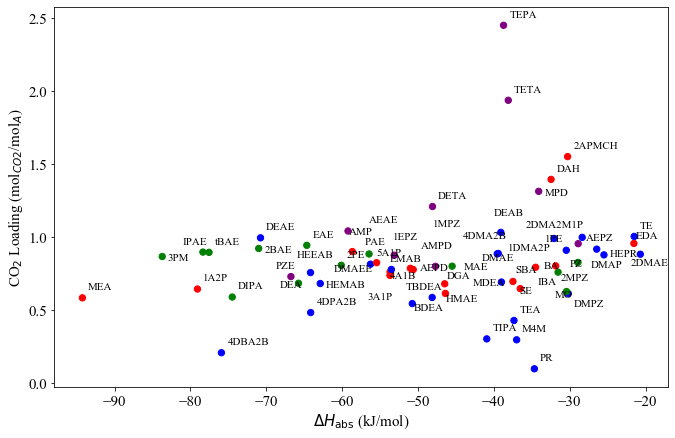

In [22]:
from adjustText import adjust_text
csfont = {'fontname': 'Times New Roman'}
fontsize = 15
markersize = 40
x = Results['dH_abs']  # Extracting the 'dH_abs' column as x-axis data
y = Results['Equilibrium alpha']  # Extracting the 'Equilibrium alpha' column as y-axis data
names = Results['Abbreviation']  # Extracting the 'Molecule' column for annotations

type_to_color = {
    'Primary': 'red',
    'Secondary': 'green',
    'Tertiary': 'blue',
    'Polyamine': 'purple'
}

# Generating an array of colors for each data point
colors = [type_to_color[type_] for type_ in Results['Type']]
plt.figure(figsize=(11, 7))
plt.scatter(x, y, c=colors, s = markersize)  # 'cmap' specifies the colormap to use for coloring points
# Adding annotations for each data point
annotations = [plt.annotate(name, (x[i], y[i]), textcoords="offset points", xytext=(5,5),
                           ha='center', fontname='Times New Roman', fontsize=fontsize-4)
               for i, name in enumerate(names)]
adjust_text(annotations)

plt.xlabel(r'$\Delta H_{\mathrm{abs}}$ (kJ/mol)', **csfont, fontsize = fontsize)
plt.ylabel('CO$_{2}$ Loading (mol$_{CO2}$/mol$_{A}$)', **csfont, fontsize = fontsize)
plt.xticks(fontname='Times New Roman', fontsize=fontsize)
plt.yticks(fontname='Times New Roman', fontsize=fontsize)
plt.show()